# Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

df = pd.read_csv('Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [14]:
len(df)

38765

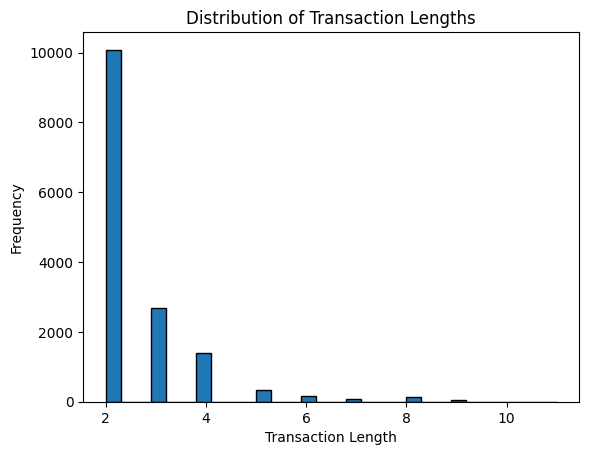

In [15]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist, bins=30, edgecolor='black')
plt.xlabel('Transaction Length')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Lengths')
plt.show()

In [16]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [17]:
results = list(apriori(transactions, min_support=0.005, min_confidence=0.2, min_lift=1.0))

In [18]:
top_10_rules = sorted(results, key=lambda x: x.ordered_statistics[0].lift, reverse=True)[:10]

for idx, rule in enumerate(top_10_rules, start=1):
    print(f"Rule {idx}:")
    print("Items:", list(rule.items))
    print("Support:", rule.support)
    print("Confidence:", rule.ordered_statistics[0].confidence)
    print("Lift:", rule.ordered_statistics[0].lift)
    print("="*30)

Rule 1:
Items: ['whole milk', 'bottled water', 'butter', 'chicken']
Support: 0.00513083632632119
Confidence: 0.20618556701030927
Lift: 3.115160233357308
Rule 2:
Items: ['whole milk', 'canned beer', 'brown bread', 'curd']
Support: 0.00538737814263725
Confidence: 0.2692307692307692
Lift: 3.086651583710407
Rule 3:
Items: ['frankfurter', 'bottled water', 'brown bread', 'soda']
Support: 0.00513083632632119
Confidence: 0.22988505747126436
Lift: 3.017144626340029
Rule 4:
Items: ['rolls/buns', 'bottled water', 'soda', 'yogurt', 'sausage']
Support: 0.005643919958953309
Confidence: 0.2894736842105263
Lift: 2.9693905817174517
Rule 5:
Items: ['shopping bags', 'soda', 'tropical fruit', 'pork']
Support: 0.0061570035915854285
Confidence: 0.2376237623762376
Lift: 2.903628293863869
Rule 6:
Items: ['pip fruit', 'other vegetables', 'bottled water', 'pork']
Support: 0.005900461775269369
Confidence: 0.2090909090909091
Lift: 2.890199871050935
Rule 7:
Items: ['beef', 'yogurt', 'soda', 'pork']
Support: 0.0051